# 1.Importación librerías

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

# 2.Importación fuente de datos

In [2]:
#Fuente datos: https://www.kaggle.com/alxmamaev/flowers-recognition
mi_directorio = 'C:\\Users\\ivan_pinar\\Google Drive\\Creación de MOCs\\MOC Deep Learning\\Scripts\\CNN Imágenes RGB\Flores'

In [3]:
# Confirmar que tenemos las carpetas 'test' y 'train'
os.listdir(mi_directorio) 

['test', 'train']

In [4]:
train_path = mi_directorio+'\\train\\'
test_path = mi_directorio+'\\test\\'

In [5]:
os.listdir(train_path)

['Diente de León', 'Girasol', 'Margarita', 'Rosa', 'Tulipán']

In [6]:
os.listdir(test_path)

['Diente de León', 'Girasol', 'Margarita', 'Rosa', 'Tulipán']

# 3.Preprocesado

## 3.1Visualización de imágenes

In [7]:
os.listdir(train_path+'\\Diente de León')[0]

'10043234166_e6dd915111_n.jpg'

In [8]:
ruta_dienteleon = train_path+'\\Diente de León'+'\\10043234166_e6dd915111_n.jpg'

In [9]:
imagen_dienteleon= imread(ruta_dienteleon)

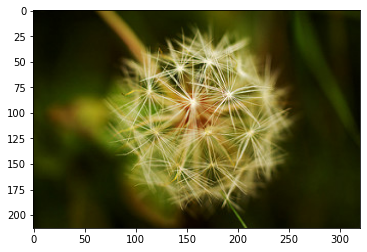

In [10]:
plt.imshow(imagen_dienteleon)

In [11]:
imagen_dienteleon.shape

(213, 320, 3)

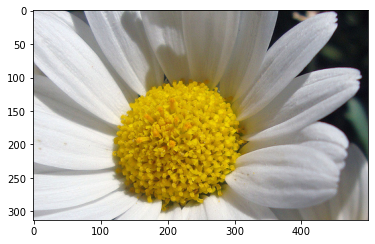

In [12]:
ruta_margarita = train_path+'\\Margarita\\'+os.listdir(train_path+'\\Margarita')[0]
imagen_margarita = imread(ruta_margarita)
plt.imshow(imagen_margarita)

**¿Cuántas imágenes tenemos en la carpeta de entrenamiento**

In [13]:
len(os.listdir(train_path+'\\Diente de León'))

952

In [14]:
len(os.listdir(train_path+'\\Girasol'))

634

In [15]:
len(os.listdir(train_path+'\\Margarita'))

669

In [16]:
len(os.listdir(train_path+'\\Rosa'))

684

In [17]:
len(os.listdir(train_path+'\\Tulipán'))

884

## 3.2 Calcular dimensiones promedio

In [26]:
#Debemos calcular unas dimensiones promedio que serán las que posteriormente pasemos a la CNN

In [18]:
imagen_dienteleon.shape

(213, 320, 3)

In [19]:
imagen_margarita.shape

(313, 500, 3)

In [20]:
dim1_ddl = []
dim2_ddl = []
for fichero_imagen in os.listdir(train_path+'\\Diente de León'):
    
    img = imread(train_path+'\\Diente de León'+'\\'+fichero_imagen)
    d1,d2,colors = img.shape
    dim1_ddl.append(d1)
    dim2_ddl.append(d2)

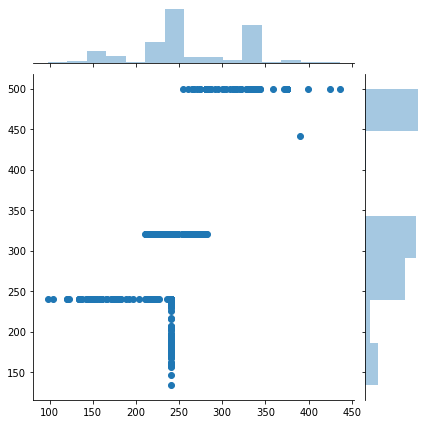

In [21]:
sns.jointplot(dim1_ddl,dim2_ddl)

In [22]:
np.mean(dim1_ddl)

255.85294117647058

In [23]:
np.mean(dim2_ddl)

344.24789915966386

In [24]:
#Calcular resto categorías
dim1_gir = []
dim2_gir = []
for fichero_imagen in os.listdir(train_path+'\\Girasol'):
    
    img = imread(train_path+'\\Girasol'+'\\'+fichero_imagen)
    d1,d2,colors = img.shape
    dim1_gir.append(d1)
    dim2_gir.append(d2)
    
dim1_mar = []
dim2_mar = []
for fichero_imagen in os.listdir(train_path+'\\Margarita'):
    
    img = imread(train_path+'\\Margarita'+'\\'+fichero_imagen)
    d1,d2,colors = img.shape
    dim1_mar.append(d1)
    dim2_mar.append(d2)
    
dim1_rosa = []
dim2_rosa = []
for fichero_imagen in os.listdir(train_path+'\\Rosa'):
    
    img = imread(train_path+'\\Rosa'+'\\'+fichero_imagen)
    d1,d2,colors = img.shape
    dim1_rosa.append(d1)
    dim2_rosa.append(d2)
    
dim1_tul = []
dim2_tul = []
for fichero_imagen in os.listdir(train_path+'\\Tulipán'):
    
    img = imread(train_path+'\\Tulipán'+'\\'+fichero_imagen)
    d1,d2,colors = img.shape
    dim1_tul.append(d1)
    dim2_tul.append(d2)

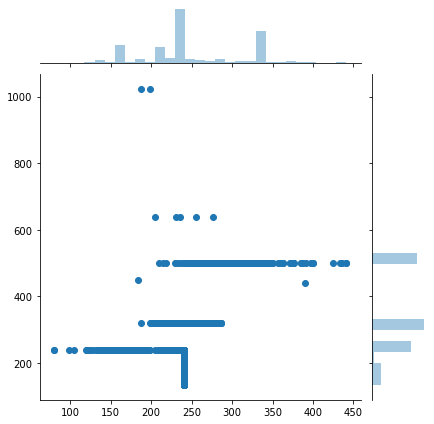

In [25]:
#Representamos las dimensiones de las imágenes de todas las categorías
sns.jointplot(dim1_ddl+dim1_gir+dim1_mar+dim1_rosa+dim1_tul,dim2_ddl+dim2_gir+dim2_mar+dim2_rosa+dim2_tul)

In [26]:
np.mean(dim1_ddl+dim1_gir+dim1_mar+dim1_rosa+dim1_tul)

248.3693434475543

In [27]:
np.mean(dim2_ddl+dim2_gir+dim2_mar+dim2_rosa+dim2_tul)

332.7849856133926

In [41]:
image_shape = (250,335,3)

# 3.3 Manipulación de imágenes

Es buena idea manipular las imágenes con rotaciones, reescalados, desplazamientos,... para hacer más robusto al modelo 
con más imágenes (artificiales) que nuestros dataset no contiene --> **ImageDataGenerator**

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [39]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [29]:
image_gen = ImageDataGenerator(rotation_range=20, # rotación máxima de 20º (depende del caso de uso)
                               width_shift_range=0.10, # Desplazamiento en la anchura máximo del -5% --- +5%
                               height_shift_range=0.10, # Desplazamiento en la altura máximo del -5% --- +5%
                               rescale=1/255, # Reescalar la imagen para normalizarla entre 0-1
                               shear_range=0.1, # Distorsión de la imagen a partir de un eje - persepectiva (max 10%)
                               zoom_range=0.1, # Zoom in máximo 10%
                               horizontal_flip=True, # Permitir giro horizontal de la imagen (espejo)
                               fill_mode='nearest' # Rellenar píxeles vacíos con el valor más cercano
                              )

#Ejemplos de manipulación de imágenes: https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

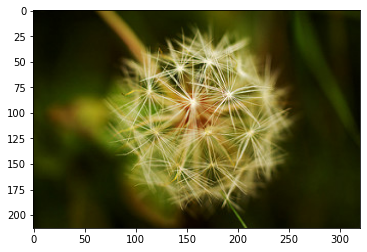

In [30]:
plt.imshow(imagen_dienteleon)

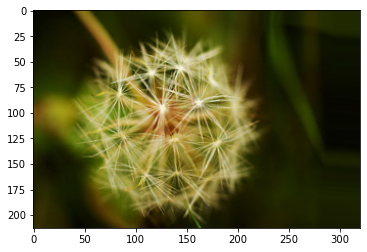

In [36]:
plt.imshow(image_gen.random_transform(imagen_dienteleon))

Para poder generar imágenes manipuladas desde un directorio, debe haber una carpeta por clase de imágenes:
* Carpeta de imágenes
    * Clase 1
        * 0.jpg
        * 1.jpg
        * ...
    * Clase 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Clase n

In [37]:
image_gen.flow_from_directory(train_path)

Found 3823 images belonging to 5 classes.


In [38]:
image_gen.flow_from_directory(test_path)

Found 500 images belonging to 5 classes.


In [39]:
batch_size = 16 #Definimos un batch_size en función de la RAM

In [42]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2], #image_shape = (250,335,3), target_size solo necesita anchura x altura
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical') #binary si clasificación binaria

Found 3823 images belonging to 5 classes.


In [43]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False) #En el conjunto de test no aplicamos shuffle para no "barajar" las imágenes

Found 500 images belonging to 5 classes.


In [44]:
train_image_gen.class_indices

{'Diente de León': 0, 'Girasol': 1, 'Margarita': 2, 'Rosa': 3, 'Tulipán': 4}

# 4.Creación del Modelo

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [46]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

# CAPA CONVOLUCIONAL
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

# CAPA CONVOLUCIONAL (más capas convolucionales conforme mayor complejidad del dataset de imágenes, aumentar progresivamente número de filtros en potencia de 2)
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

# CAPA CONVOLUCIONAL (más capas convolucionales conforme mayor complejidad del dataset de imágenes, aumentar progresivamente número de filtros en potencia de 2)
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

# CAPA FLATTEN: Convierte las imágenes de 250x335 en un array de 1 dimensión de 250x335 = 83750 valores antes de la capa final
model.add(Flatten())

# CAPA DENSE (Indicar neuronas potencia de 2, variable para optimizar modelo)
model.add(Dense(128))
model.add(Activation('relu'))

# CAPA DROPOUT (ayuda a reducir overfitting desactivando aleatoriamente neuronas durante el entrenamiento)
model.add(Dropout(0.5))

# CAPA FINAL DE CLASIFICACIÓN (5 posibles clases = 5 neuronas, si fuera problema binario utilizar 'sigmoid' y 1 neurona)
model.add(Dense(5, activation='softmax'))


model.compile(loss='categorical_crossentropy', #binary_crossentropy si fuera binario
              optimizer='adam',
              metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 333, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 166, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 164, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 82, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 80, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 40, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 74240)             0

# 5.Entrenamiento del modelo

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
results = model.fit_generator(train_image_gen,
                              epochs=5,
                              validation_data=test_image_gen,
                              callbacks=[early_stop])

Epoch 1/5
239/239 [==============================] - 244s 1s/step - loss: 1.4761 - accuracy: 0.3559 - val_loss: 1.0801 - val_accuracy: 0.5560
Epoch 2/5
239/239 [==============================] - 242s 1s/step - loss: 1.1784 - accuracy: 0.5222 - val_loss: 1.0064 - val_accuracy: 0.6060
Epoch 3/5
239/239 [==============================] - 241s 1s/step - loss: 1.0430 - accuracy: 0.5858 - val_loss: 1.0060 - val_accuracy: 0.6400
Epoch 4/5
239/239 [==============================] - 241s 1s/step - loss: 0.9938 - accuracy: 0.6058 - val_loss: 0.8601 - val_accuracy: 0.6680
Epoch 5/5
239/239 [==============================] - 241s 1s/step - loss: 0.9466 - accuracy: 0.6480 - val_loss: 0.8416 - val_accuracy: 0.6780


In [ ]:
from tensorflow.keras.models import load_model
model.save('modelo_CNN_flores.h5')

In [52]:
losses = pd.DataFrame(model.history.history)

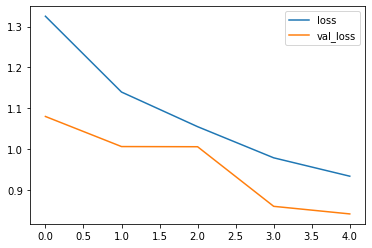

In [53]:
losses[['loss','val_loss']].plot()

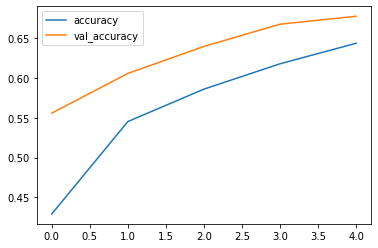

In [54]:
losses[['accuracy','val_accuracy']].plot()

# 6. Evaluación del modelo

## 6.1 Predicción sobre el conjunto de Test

In [55]:
model.metrics_names

['loss', 'accuracy']

In [56]:
model.evaluate_generator(test_image_gen)

[0.8526486754417419, 0.6859999895095825]

In [57]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras
pred_probabilities = model.predict_generator(test_image_gen)

In [58]:
pred_probabilities

array([[9.0841889e-01, 8.6386036e-04, 5.0951436e-02, 2.5134396e-02,
        1.4631428e-02],
       [1.9330379e-01, 1.1604764e-02, 6.2081712e-01, 1.4026842e-01,
        3.4005918e-02],
       [9.7479773e-01, 8.4570813e-05, 1.7135175e-02, 4.5158304e-03,
        3.4666958e-03],
       ...,
       [7.3121322e-15, 2.2862580e-11, 1.4194968e-11, 1.0376467e-02,
        9.8962349e-01],
       [1.1352399e-06, 2.8296857e-04, 1.3128004e-05, 5.4859467e-02,
        9.4484329e-01],
       [4.5597400e-08, 2.3178942e-05, 1.9388731e-06, 1.3671444e-01,
        8.6326045e-01]], dtype=float32)

In [59]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [60]:
predictions = model.predict_classes(test_image_gen)
#Usar si la sale predict_classes como deprecated: predictions = np.argmax(model.predict(test_image_gen), axis=-1)

In [61]:
predictions

array([0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1,
       0, 0, 1, 0, 2, 4, 1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3,
       1, 1, 1, 1, 1, 1, 0, 4, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 3, 2, 2, 3, 2, 0, 2, 3, 0, 2, 2, 2, 3, 2, 3, 2, 3, 3,
       2, 3, 2, 2, 2, 2, 3, 2, 0, 3, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 3, 3, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 3, 2, 2, 0, 2, 0, 3, 2, 2, 1, 3, 2, 2, 2,
       2, 0, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 2, 2, 3,

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       100
           1       0.70      0.87      0.77       100
           2       0.76      0.61      0.68       100
           3       0.52      0.66      0.58       100
           4       0.75      0.51      0.61       100

    accuracy                           0.66       500
   macro avg       0.68      0.66      0.66       500
weighted avg       0.68      0.66      0.66       500



In [64]:
confusion_matrix(test_image_gen.classes,predictions)

array([[66, 26,  6,  1,  1],
       [ 4, 87,  4,  3,  2],
       [20,  4, 61, 15,  0],
       [ 7,  5,  8, 66, 14],
       [ 3,  3,  1, 42, 51]], dtype=int64)

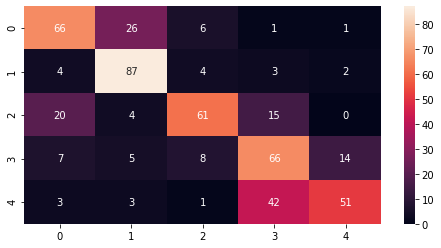

In [65]:
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(test_image_gen.classes,predictions),annot=True)

## 6.2 Predicción para una nueva imagen

In [87]:
ruta_nueva_imagen = train_path+'\\Rosa\\'+os.listdir(train_path+'\\Rosa')[45]

In [79]:
from tensorflow.keras.preprocessing import image

In [88]:
nueva_imagen = image.load_img(ruta_nueva_imagen,target_size=image_shape)

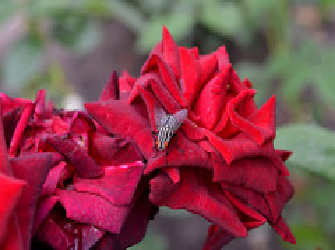

In [89]:
nueva_imagen

In [70]:
type(nueva_imagen)

PIL.Image.Image

In [90]:
nueva_imagen = image.img_to_array(nueva_imagen)

In [72]:
type(nueva_imagen)

numpy.ndarray

In [91]:
nueva_imagen.shape

(250, 335, 3)

In [92]:
nueva_imagen = np.expand_dims(nueva_imagen, axis=0)

In [93]:
nueva_imagen.shape

(1, 250, 335, 3)

In [94]:
model.predict(nueva_imagen) #Detecta la clase 3 = rosa

array([[0., 0., 0., 1., 0.]], dtype=float32)

In [86]:
test_image_gen.class_indices

{'Diente de León': 0, 'Girasol': 1, 'Margarita': 2, 'Rosa': 3, 'Tulipán': 4}